In [1]:
# Import All Library
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define Some Function
def change_color_space_masking(img, lower, upper, color_space):
    if color_space == "hsv":
        new_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    elif color_space == "ycrcb":
        new_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    elif color_space == "lab":
        new_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    mask_img = cv2.inRange(new_img, lower, upper)
    return mask_img

def preprocessing_image(img, lower, upper, method):
    plt.figure(figsize=(19, 50))

    # Create Mask
    img_lab_mask = change_color_space_masking(
        img, lower, upper, method
    )
    plt.subplot(1, 5, 1)
    plt.title("Masking Image")
    plt.imshow(img_lab_mask, cmap='gray')

    # Merge Image
    img_final = cv2.bitwise_and(img, img, mask=img_lab_mask)
    plt.subplot(1, 5, 2)
    plt.title("Merge Image")
    plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))

    # Change Image Into Gray
    img_gray = cv2.cvtColor(img_final, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 5, 3)
    plt.title("Gray Image")
    plt.imshow(img_gray, cmap='gray')

    # Blur Image
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    plt.subplot(1, 5, 4)
    plt.title("Blur Image")
    plt.imshow(img_blur, cmap='gray')

    # Thresholding Image
    ret, img_thresh = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY)
    plt.subplot(1, 5, 5)
    plt.title("Thresholding Image")
    plt.imshow(img_thresh, cmap='gray')

    plt.show()

    return img_thresh

def get_large_of_fire(img_final, img_contour):
    img_contours, hierarchy = cv2.findContours(
        img_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
    )
    all_area_contours = []
    for contour in img_contours:
        area = cv2.contourArea(contour)
        all_area_contours.append(area)
        cv2.drawContours(img_contour, [contour], -1, (255, 0, 0), cv2.FILLED)
    area_countour = sum(all_area_contours)

    return area_countour, img_contour

In [3]:
# Define Lower and Upper Bound Color Space LAB
LOWER_LAB_1_VALUE = np.array([82, 0, 159], dtype="uint8")
UPPER_lAB_1_VALUE = np.array([255, 255, 255], dtype="uint8")

LOWER_LAB_3_VALUE = np.array([117, 0, 156], dtype="uint8")
UPPER_lAB_3_VALUE = np.array([255, 255, 255], dtype="uint8")

LOWER_LAB_5_VALUE = np.array([134, 0, 149], dtype="uint8")
UPPER_lAB_5_VALUE = np.array([255, 240, 255], dtype="uint8")

# Define Lower and Upper Bound Color Space HSV
LOWER_HSV_1_VALUE = np.array([0, 0, 148], dtype="uint8")
UPPER_HSV_1_VALUE = np.array([179, 255, 255], dtype="uint8")

LOWER_HSV_3_VALUE = np.array([2, 48, 165], dtype="uint8")
UPPER_HSV_3_VALUE = np.array([151, 255, 255], dtype="uint8")

LOWER_HSV_5_VALUE = np.array([1, 29, 181], dtype="uint8")
UPPER_HSV_5_VALUE = np.array([137, 255, 255], dtype="uint8")

# Define Lower and Upper Bound Color Space YCrCb
LOWER_YCRCB_1_VALUE = np.array([103, 0, 0], dtype="uint8")
UPPER_YCRCB_1_VALUE = np.array([255, 255, 255], dtype="uint8")

LOWER_YCRCB_3_VALUE = np.array([119, 0, 0], dtype="uint8")
UPPER_YCRCB_3_VALUE = np.array([255, 255, 151], dtype="uint8")

LOWER_YCRCB_5_VALUE = np.array([121, 21, 14], dtype="uint8")
UPPER_YCRCB_5_VALUE = np.array([255, 255, 193], dtype="uint8")

# **Forest Fire Segmentation With Color Space LAB**

---



# **A. Lower Bound and Upper Bound with 1 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai LAB dari 1 gambar dan digunakan untuk menseleksi api yang ada di hutan.

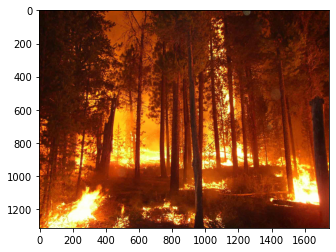

In [4]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

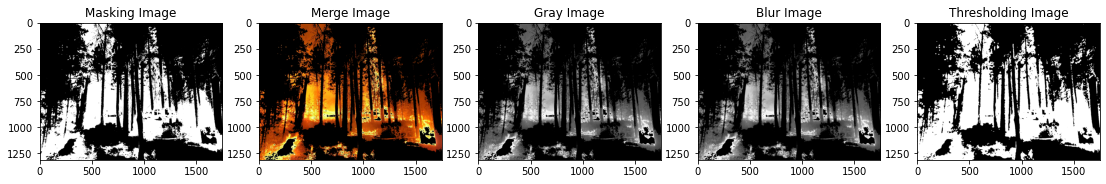

In [5]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_LAB_1_VALUE, 
                                UPPER_lAB_1_VALUE, "lab")

In [6]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 1011353.5


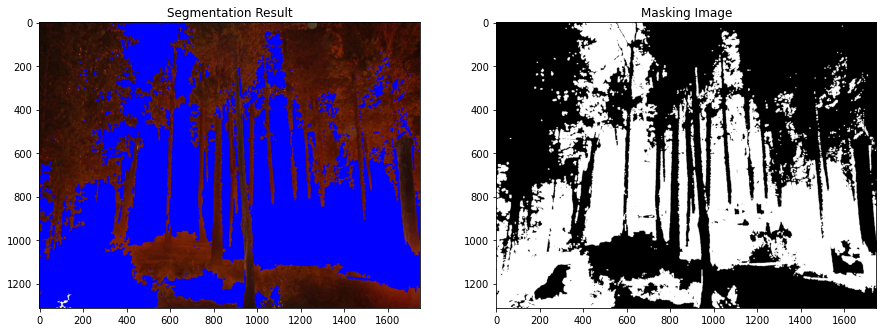

In [7]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **B. Lower Bound and Upper Bound with 3 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai LAB dari rata-rata 3 gambar dan digunakan untuk menseleksi api yang ada di hutan.

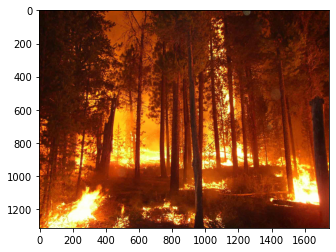

In [8]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

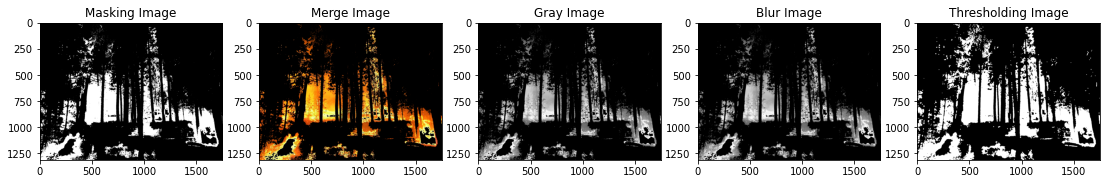

In [9]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_LAB_3_VALUE, 
                                UPPER_lAB_3_VALUE, "lab")

In [10]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 610982.0


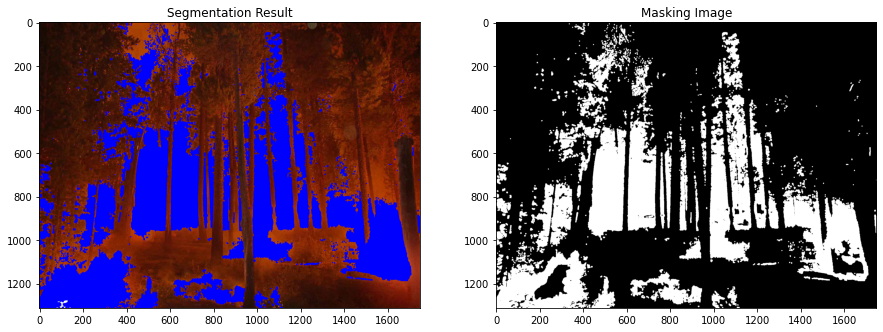

In [11]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **C. Lower Bound and Upper Bound with 5 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai LAB dari rata-rata 5 gambar dan digunakan untuk menseleksi api yang ada di hutan.

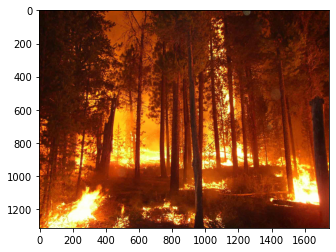

In [12]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

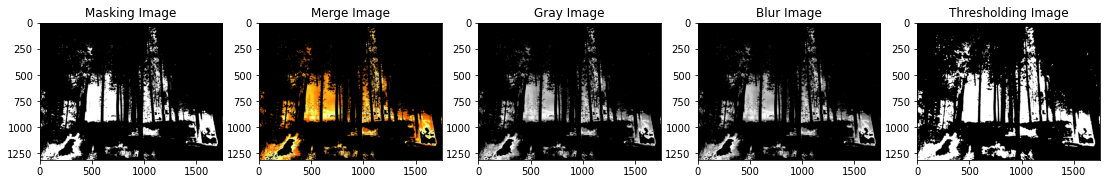

In [13]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_LAB_5_VALUE, 
                                UPPER_lAB_5_VALUE, "lab")

In [14]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 501960.0


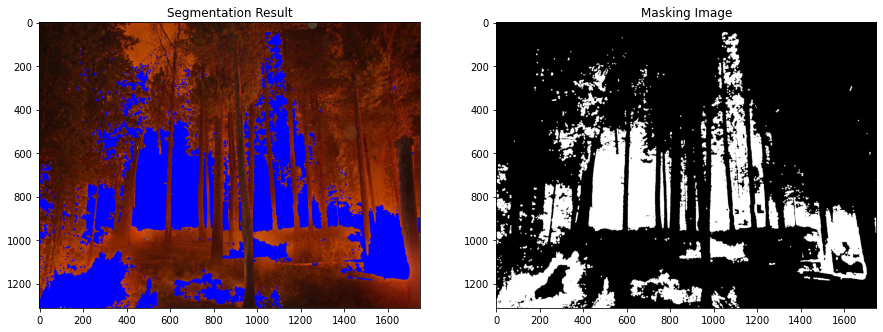

In [15]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **Forest Fire Segmentation With Color Space HSV**

---



# **A. Lower Bound and Upper Bound with 1 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai HSV dari 1 gambar dan digunakan untuk menseleksi api yang ada di hutan.

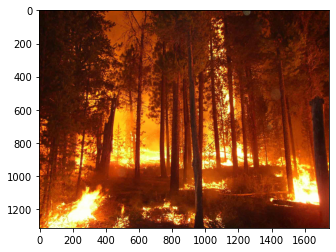

In [16]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

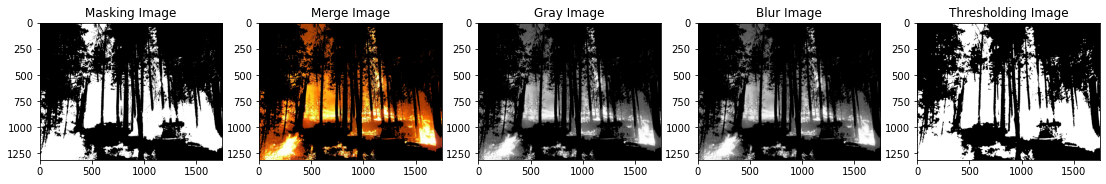

In [17]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_HSV_1_VALUE, 
                                UPPER_HSV_1_VALUE, "hsv")

In [18]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 883011.5


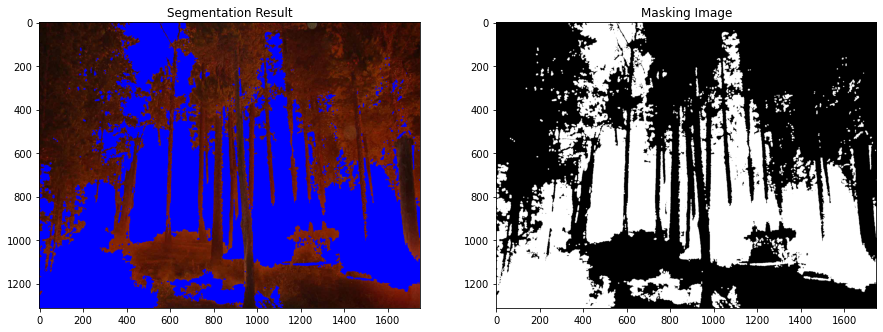

In [19]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **B. Lower Bound and Upper Bound with 3 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai HSV dari rata-rata 3 gambar dan digunakan untuk menseleksi api yang ada di hutan.

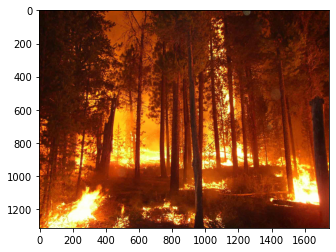

In [20]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

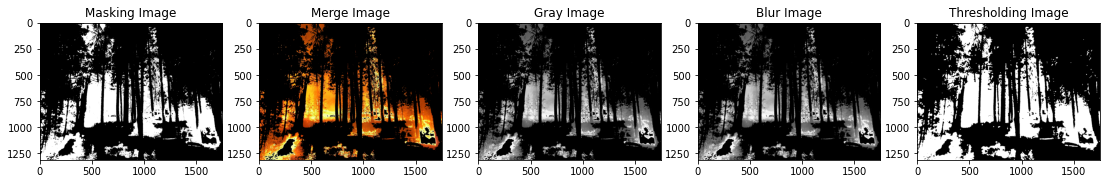

In [21]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_HSV_3_VALUE, 
                                UPPER_HSV_3_VALUE, "hsv")

In [22]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 746298.5


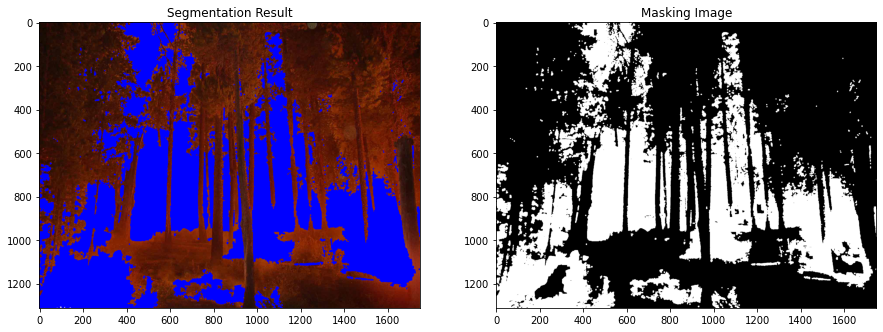

In [23]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **C. Lower Bound and Upper Bound with 5 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai HSV dari rata-rata 5 gambar dan digunakan untuk menseleksi api yang ada di hutan.

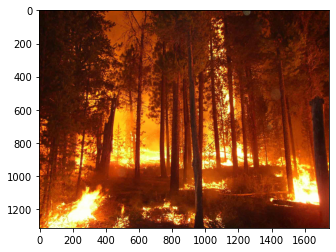

In [24]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

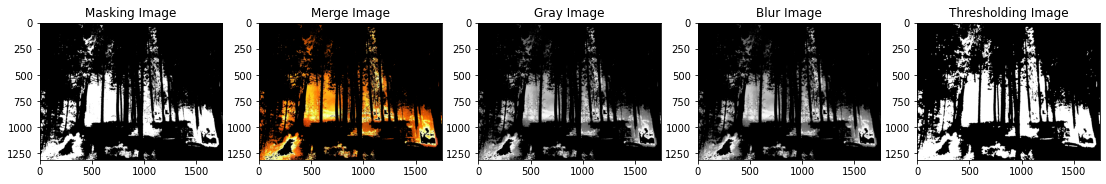

In [25]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_HSV_5_VALUE, 
                                UPPER_HSV_5_VALUE, "hsv")

In [26]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 621668.0


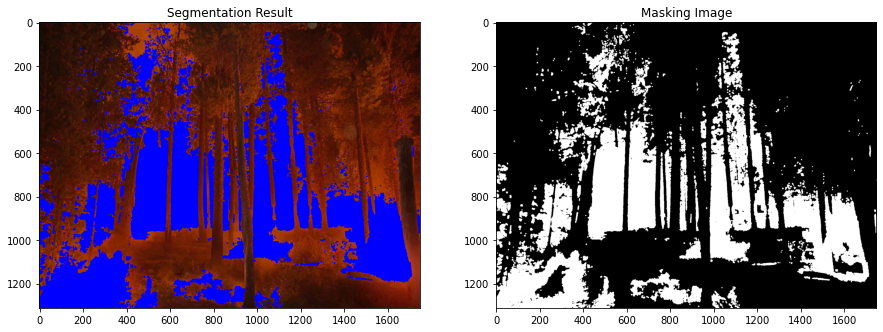

In [27]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **Forest Fire Segmentation With Color Space YCrCb**

---



# **A. Lower Bound and Upper Bound with 1 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai YCrCb dari 1 gambar dan digunakan untuk menseleksi api yang ada di hutan.

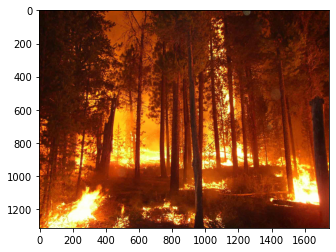

In [28]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

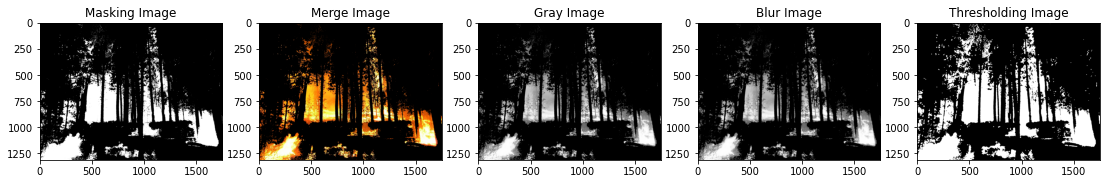

In [29]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_YCRCB_1_VALUE, 
                                UPPER_YCRCB_1_VALUE, "ycrcb")

In [30]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 600023.0


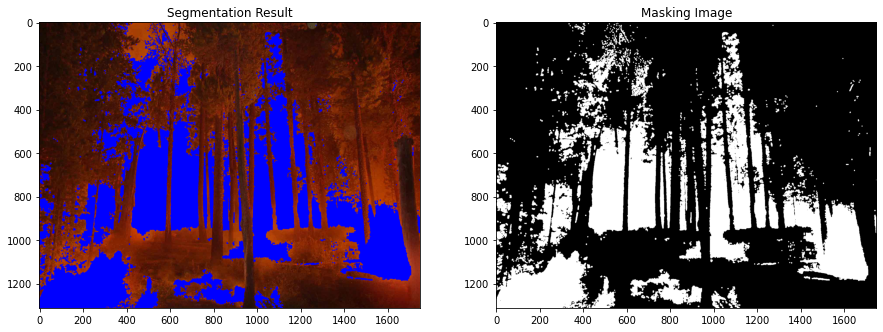

In [31]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **B. Lower Bound and Upper Bound with 3 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai YCrCb dari rata-rata 3 gambar dan digunakan untuk menseleksi api yang ada di hutan.

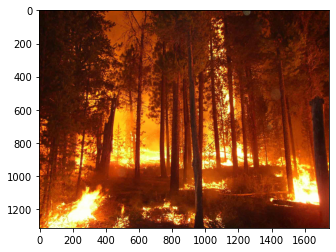

In [32]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

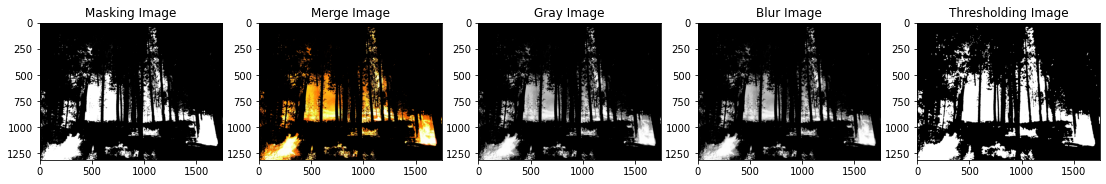

In [33]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_YCRCB_3_VALUE, 
                                UPPER_YCRCB_3_VALUE, "ycrcb")

In [34]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 498367.0


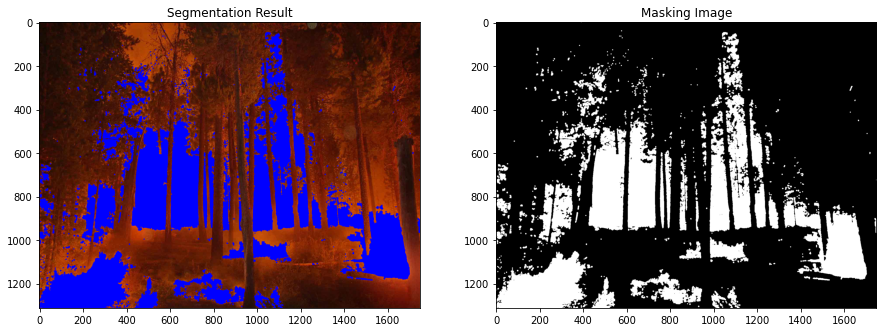

In [35]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

# **C. Lower Bound and Upper Bound with 5 Image Value**
Pada kali ini, nilai yang digunakan adalah hasil masking nilai YCrCb dari rata-rata 5 gambar dan digunakan untuk menseleksi api yang ada di hutan.

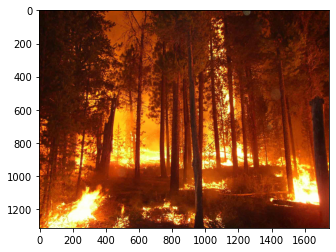

In [36]:
# Read Img
img = cv2.imread("./forest_fire1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

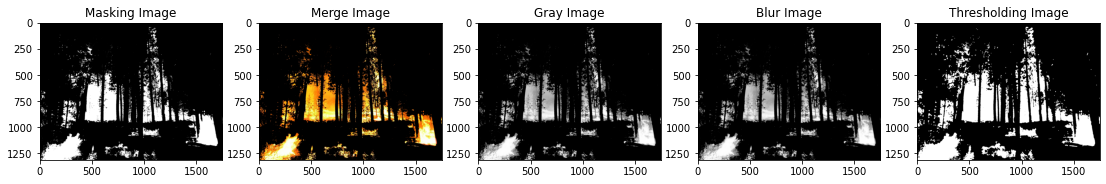

In [37]:
# Preprocessing Image
img_final = preprocessing_image(img, LOWER_YCRCB_5_VALUE, 
                                UPPER_YCRCB_5_VALUE, "ycrcb")

In [38]:
# Get Large of Fire
large_of_fire, new_img = get_large_of_fire(img_final, img)
print("Large of Fire", large_of_fire)

Large of Fire 489511.5


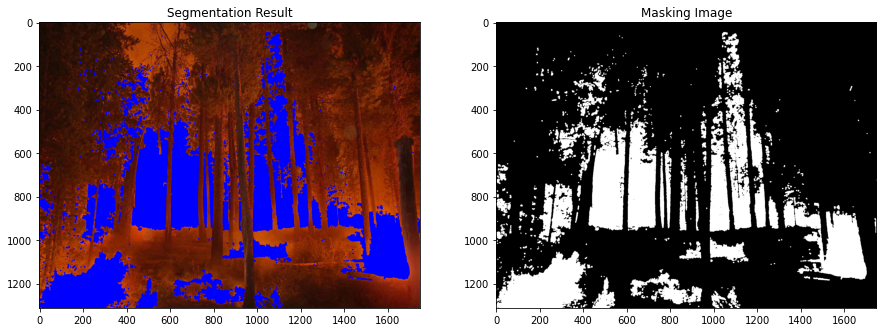

In [39]:
# Check Fires
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title("Segmentation Result")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Masking Image")
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()